# Import Libraries

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# Reading Data Set

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [5]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"] == "Urban")

66

In [10]:
# Get the number of data points from the Suburban cities.
sum(city_data_df["type"] == "Suburban")

36

In [11]:
# Get the number of data points from the Rural cities.
sum(city_data_df["type"] == "Rural")

18

In [12]:
# Get the columns and the rows of ride data that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

# Combine Two Data Sets

In [15]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df,city_data_df, how="left", on=["city","city"])
# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Create Sub-Data Sets by City Type

In [16]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# Create the Suburban DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [18]:
# Create the Rural DataFrame
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


## Get Number of Rides by City Type

In [19]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [20]:
# Create the suburban ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [21]:
# Create the rural ride count.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

## Get Average Fares by City Type

In [22]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [23]:
# Get average fare for each city in the suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [24]:
# Get average fare for each city in the rural cities.
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

## Get the Average Number of Drivers by City Type

In [25]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [26]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [27]:
# Get the average number of drivers for each city for the suburban and rural cities.
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

### Build the Scatter Plots for Cities: Ride Count, Average Fare and Average Number of Drivers

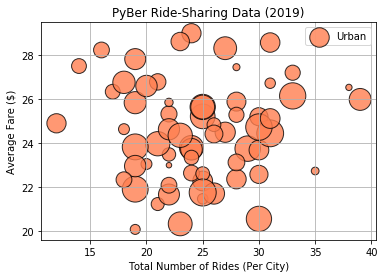

In [28]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare,
            s= 10* urban_driver_count, c="coral",ec="black",lw=1,alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

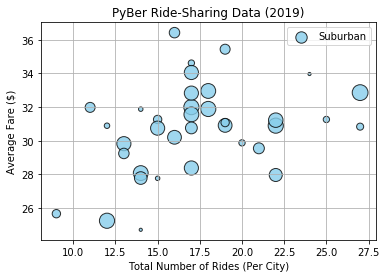

In [29]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

plt.show()

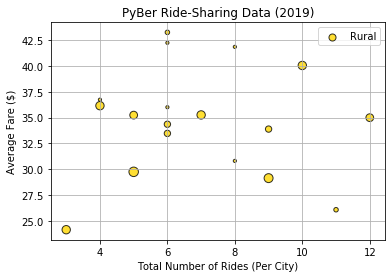

In [30]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()
plt.show()

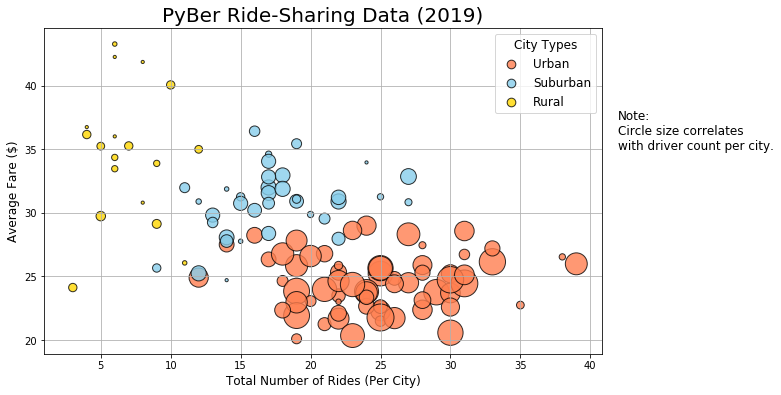

In [31]:
# Add the scatter charts for each type of city.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, 
      urban_avg_fare, 
      s=10*urban_driver_count, c="coral", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
      suburban_avg_fare, 
      s=10*suburban_driver_count, c="skyblue", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
      rural_avg_fare, 
      s=10*rural_driver_count, c="gold", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()

# Summary Statistics

In [32]:
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [33]:
# Get summary statistics.
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [34]:
# Get summary statistics.
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [35]:
# Get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [36]:
# Get summary statistics.
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [37]:
# Get summary statistics.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [38]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [39]:
# Get the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [40]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [41]:
# Calculate the mode of the ride count for the suburban cities.
suburban_ride_count.mode()

0    17
dtype: int64

In [42]:
# Calculate the mode of the ride count for the rural cities.
rural_ride_count.mode()

0    6
dtype: int64

In [43]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [44]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [45]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [46]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count:.2f}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.00.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [47]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [48]:
# Calculate the measures of central tendency for the average fares for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [49]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [50]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [51]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [52]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is ${mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [53]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

# Calculate the measures of central tendency

In [54]:
# Calculate the measures of central tendency for driver count for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers for urban trips is {int(mean_urban_drivers)}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers for urban trips is {int(median_urban_drivers)}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers for urban trips is {mode_urban_drivers}.")

The mean number of drivers for urban trips is 36.
The median number of drivers for urban trips is 37.
The mode number of drivers for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [55]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df["driver_count"]
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [56]:
# Calculate the measures of central tendency for the drivers count for the suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers for urban trips is {int(mean_suburban_drivers)}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers for urban trips is {int(median_suburban_drivers)}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of drivers for urban trips is {mode_suburban_drivers}.")

The mean number of drivers for urban trips is 13.
The median number of drivers for urban trips is 16.
The mode number of drivers for urban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [57]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df["driver_count"]
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [58]:
# Calculate the measures of central tendency for the drivers count for the rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers for rural trips is {int(mean_rural_drivers)}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers for rural trips is {int(median_rural_drivers)}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of drivers for rural trips is {(mode_rural_drivers)}.")

The mean number of drivers for rural trips is 4.
The median number of drivers for rural trips is 4.
The mode number of drivers for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


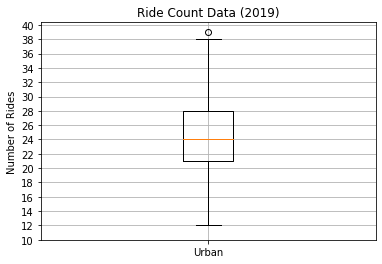

In [59]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

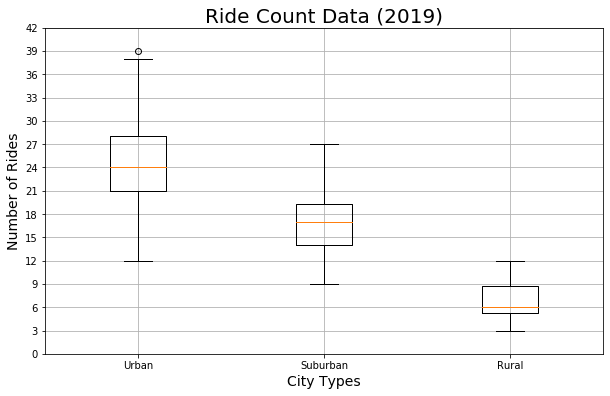

In [60]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [61]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


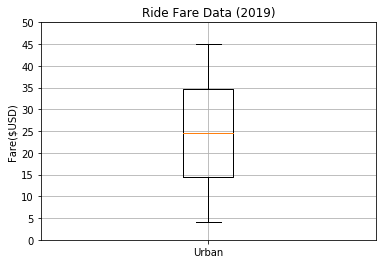

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [62]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

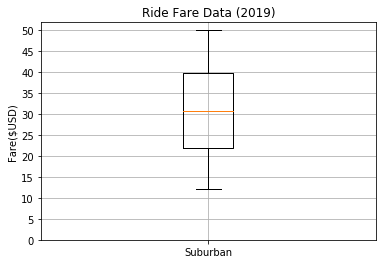

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [63]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

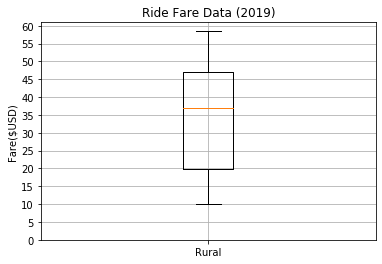

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [64]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

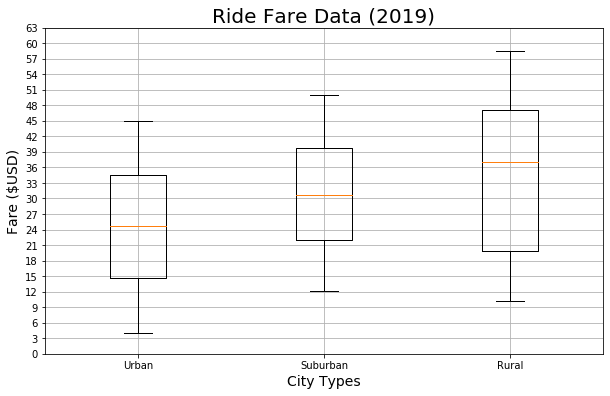

In [65]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 65, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

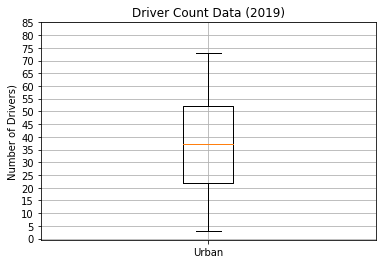

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [66]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

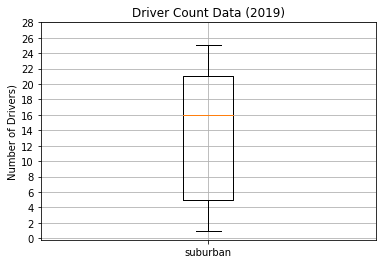

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [67]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 30, step=2.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

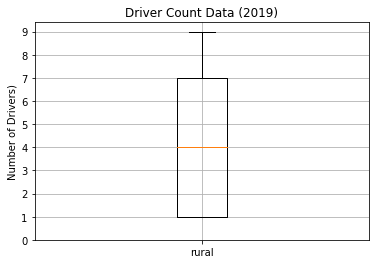

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [68]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 10, step=1.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

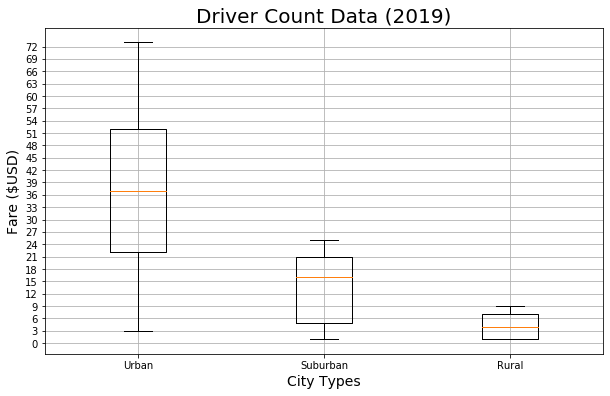

In [69]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 75, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

# Calculate the Percentages

In [70]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [71]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [72]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [73]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

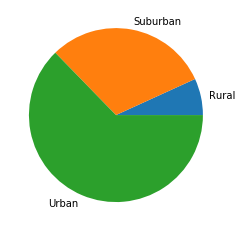

In [74]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

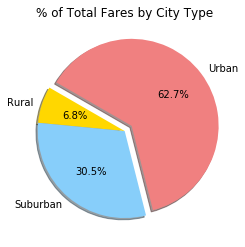

In [75]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Show Figure
plt.show()

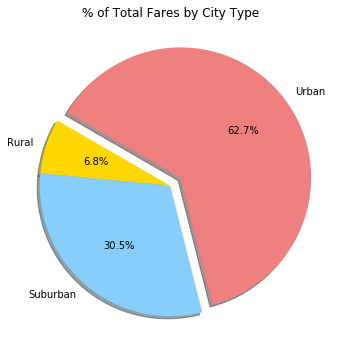

In [76]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [77]:
# Calculate rides per city
ride_per_city = pyber_data_df.groupby(["type"]).count()["ride_id"]
ride_per_city

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [78]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

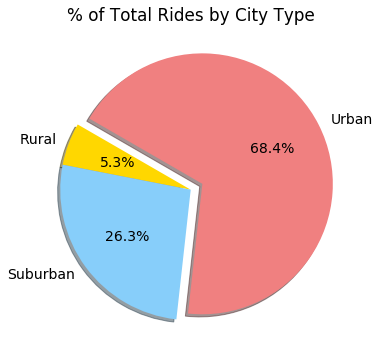

In [79]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [80]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] /city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

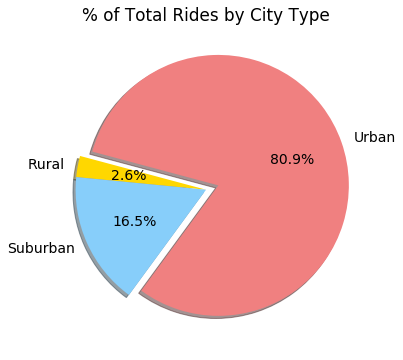

In [81]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()

# Calculate Average Fare per Ride and Average Fare per Driver

In [82]:
# Get total ride by city
ride_per_city

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [83]:
# Average Fare per Ride by city
fare_per_ride_by_type = sum_fares_by_type/ride_per_city
fare_per_ride_by_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [84]:
# Get total drivers by city
sum_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
sum_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [85]:
# Average Fare per Driver
fare_per_driver_by_type = sum_fares_by_type/sum_drivers_by_type
fare_per_driver_by_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

# Summary Data Frame

In [86]:
# Generate Summary table
# Combine each Series into single DataFrame.
summary_data_df = pd.DataFrame({
                "Total Rides": ride_per_city,
                "Total Drivers": sum_drivers_by_type,
                "Total Fares": sum_fares_by_type,
                "Average Fare per Ride": fare_per_ride_by_type, 
                "Average Fare per Driver":fare_per_driver_by_type})

# summary_data_df.head()

In [87]:
# Make sure the columns are in the correct order.
summary_data_df.columns = ["Total Rides", "Total Drivers","Total Fares","Average Fare per Ride", "Average Fare per Driver"]

# Remove the index name
summary_data_df.index.name = None

# Format collums
summary_data_df["Total Fares"] = summary_data_df["Total Fares"].map("${:.2f}".format)
summary_data_df["Average Fare per Ride"] = summary_data_df["Average Fare per Ride"].map("${:.2f}".format)
summary_data_df["Average Fare per Driver"] = summary_data_df["Average Fare per Driver"].map("${:.2f}".format)

summary_data_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,$4327.93,$34.62,$55.49
Suburban,625,490,$19356.33,$30.97,$39.50
Urban,1625,2405,$39854.38,$24.53,$16.57


# Calculate Weekly Average Total Fares by City Type

In [88]:
# Rename pyber_data_df colomns
pyber_data_df = pyber_data_df.rename(columns = {'city':'City', 'date':'Date','fare':'Fare',
                      'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})
pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [89]:
# Generate a new dataFrame with Date as index
pyber_data_time_df = pyber_data_df.set_index(["Date"])[{"City Type","Fare"}]
pyber_data_time_df = pyber_data_time_df[["City Type","Fare"]]
pyber_data_time_df.head()

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58


In [90]:
# New dataFrame info
pyber_data_time_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [91]:
# Sum of fare by City Type and Date
fare_city_time = pyber_data_df.groupby(["City Type","Date"])["Fare"].sum()
fare_city_time.head()

City Type  Date               
Rural      2019-01-01 09:45:36    43.69
           2019-01-02 11:18:32    52.12
           2019-01-03 19:51:01    19.90
           2019-01-04 03:31:26    24.88
           2019-01-06 07:38:40    47.33
Name: Fare, dtype: float64

In [92]:
# Conver series into DataFrame
fare_city_time_pivot_df = pd.DataFrame(fare_city_time).pivot_table(index="Date", columns = "City Type", values = "Fare")
fare_city_time_pivot_df.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [93]:
# Choose data between Jan-April
fare_city_time_pivot_JanApr_df = fare_city_time_pivot_df.loc['2019-01-01':'2019-04-28']
fare_city_time_pivot_JanApr_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [94]:
# Change Index to Datetime Index
fare_city_time_pivot_JanApr_df.index = pd.to_datetime(fare_city_time_pivot_JanApr_df.index)
fare_city_time_pivot_JanApr_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


## Weekly Total Fare df: .resample('w').sum()

In [95]:
# Weekly Fare Sum
fare_city_time_pivot_resample = fare_city_time_pivot_JanApr_df.resample('w').sum()
fare_city_time_pivot_resample.index = pd.to_datetime(fare_city_time_pivot_resample.index)
fare_city_time_pivot_resample.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


In [96]:
fare_city_time_pivot_resample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2019-01-06 to 2019-04-28
Freq: W-SUN
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     17 non-null     float64
 1   Suburban  17 non-null     float64
 2   Urban     17 non-null     float64
dtypes: float64(3)
memory usage: 544.0 bytes


In [97]:
from scipy import stats
fare_city_time_pivot_resample.describe()

City Type,Rural,Suburban,Urban
count,17.000000,17.000000,17.000000
mean,230.217059,1040.860588,2161.000000
std,113.517344,171.878829,222.800874
min,67.650000,721.600000,1661.680000
25%,175.140000,925.270000,2044.420000
50%,191.850000,1045.060000,2162.640000
75%,303.940000,1149.270000,2356.700000
max,501.240000,1412.740000,2470.930000


# Visualize Weekly Average Total Fare by City Type

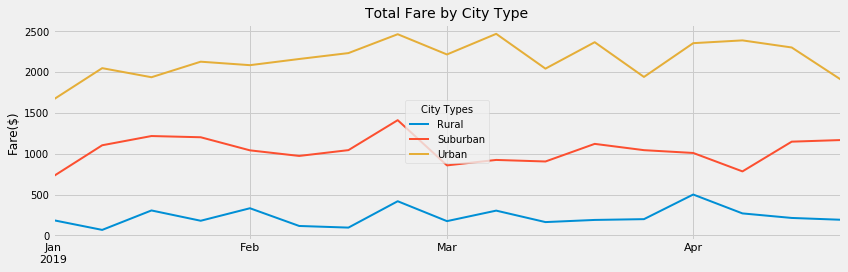

In [98]:
plt.style.use('fivethirtyeight')

ax = fare_city_time_pivot_resample.plot(figsize=(12, 4), linewidth=2)
ax.set_xlabel("")
ax.set_ylabel("Fare($)", fontsize = 12)
ax.set_title("Total Fare by City Type", fontsize=14)
ax.legend(title="City Types",fontsize = 10, loc = "center", title_fontsize = 10)
          
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 10)

plt.tight_layout()

# Save Figure
plt.savefig("analysis/Fig8.png")

plt.show()